## 👩‍💻 Task 1: Dealing with the Data

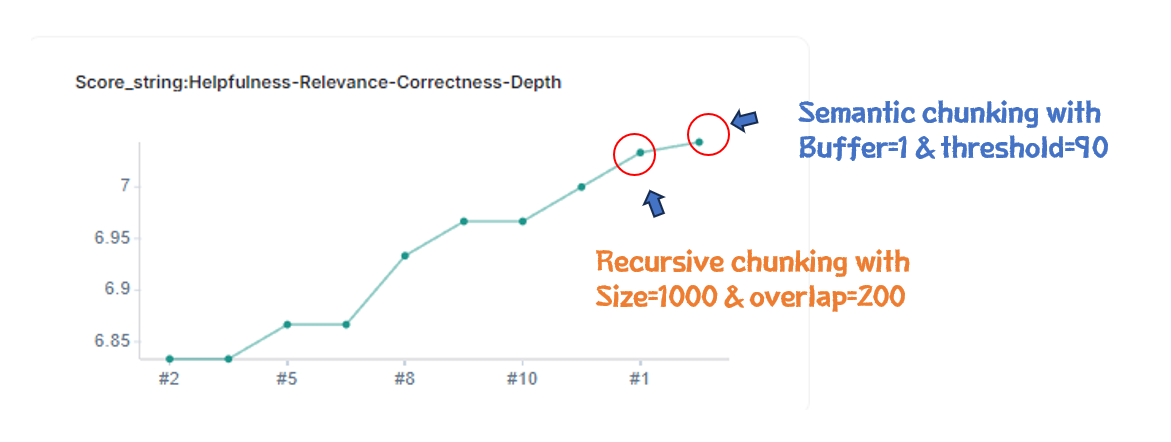

##### 🤗 Deliverables of Task 1
1. Describe the default chunking strategy that you will use.
    - I compared Recursive chunking with Semantic chunking. I selected the best parameters for each and will proceed with them.

2. Articulate a chunking strategy that you would also like to test out.
    - In the context of Dense Passage Retrieval (DPR), Recursive chunking is the de facto standard. However, new approaches, such as Semantic chunking, are gaining traction.
    - Semantic chunking divides documents based on the semantic similarity between consecutive paragraphs.
    - Semantic chunking involves two main parameters: `buffer_size` and `threshold`:
        - `buffer_size`: The number of sentences in a 'paragraph.'
        - `threshold`: If the semantic similarity exceeds this value, the Semantic chunker separates the paragraphs.
     

3. Describe how and why you made these decisions
    - Since both Recursive and Semantic chunking have their own parameter configurations, I selected a few candidates to evaluate:
        - Recursive chunking: `{'chunk_size': [200, 500, 1000], 'chunk_overlap': [0, 0.1, 0.2]}` (where `chunk_overlap` indicates the percentage of overlap).
        - Semantic chunking: `{'buffer_size': [1, 2], 'threshold': [90, 95]}`

    - I then ran evaluations on the LangSmith platform and selected the configuration with the best performance. The winners are:
        - Recursive chunking: `chunk_size=1000` and `chunk_overlap=0.2`.
        - Semantic chunking: `buffer_size=1` and `threshold=90`.

    - **Moving forward, I will use *Semantic chunking with buffer_size=1 and threshold=90* and *Recursive chunking with chunk_size=1000 and overlap=0.2* for all experiments.**
    

## 👩‍💻 Task 2: Building a Quick End-to-End Prototype
To build an end-to-end RAG (Retrieval-Augmented Generation) pipeline, we need a retriever from a vector database. The key component of a retriever is the embedding model. In this task, we will experiment with the following embedding models:

- **Open-Source Embedding Models:**
    - *Snowflake/snowflake-arctic-embed-m*
    - *all-mpnet-base-v2*

- **Reference Model:**
    - OpenAI's *text-embedding-3-small*

##### 🤗 Deliverables of Task 2
1. Build a prototype and deploy to a Hugging Face Space, and create a short (< 2 min) loom video demonstrating some initial testing inputs and outputs.
    - I failed to deploy this due to some mysterious reason... 😭😭😭

2. How did you choose your stack, and why did you select each tool the way you did?
    - **Embedding Models**: I selected the following open-source embedding models:
        - *Snowflake/snowflake-arctic-embed-m*: This model was used during AIE4 Week 5.
        - *all-mpnet-base-v2*: A popular open-source embedding model available on Hugging Face.
    
    - **Vector Database**: I chose Qdrant as my vector database provider because it offers lightweight and user-friendly vector databases.

    - **RAG Pipeline Implementation**: I utilized LangChain's LCEL to implement end-to-end RAG pipelines, as it simplifies the development of LLM applications.

## 👩‍💻 Task 3: Creating a Golden Test Data Set

##### 🤗 Deliverables of Task 3
1. Assess your pipeline using the RAGAS framework including key metrics faithfulness, answer relevancy, context precision, and context recall. Provide a table of your output results.

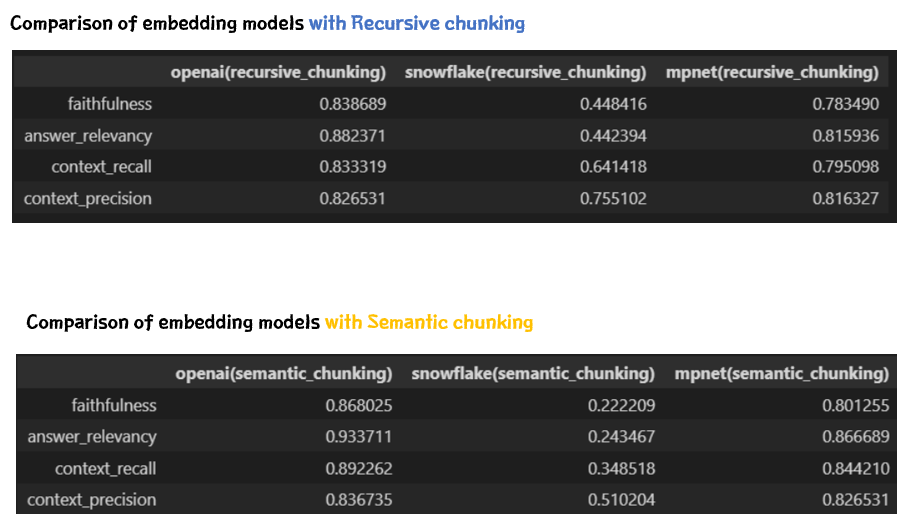

2. What conclusions can you draw about performance and effectiveness of your pipeline with this information?
    - As expected, 'OpenAI embeddings' show the best performance.
    - 'mpnet embeddings' are the second-best in terms of performance, even though 'Snowflake embeddings' and 'mpnet' have the same number of parameters.
    - For 'Snowflake embeddings', recursive chunking seems better, while semantic chunking is more promising for 'mpnet embeddings.'
    - There may be room for inprovment for each open-source models.

## 👩‍💻 Task 4: Fine-Tuning Open-Source Embeddings

##### 🤗 Deliverables of Task 4
1. Swap out your existing embedding model for the new fine-tuned version.  Provide a link to your fine-tuned embedding model on the Hugging Face Hub.
- [link: Finetuned 'Snowflake/snowflake-arctic-embed-m' with recursive chunking strategy](https://huggingface.co/jet-taekyo/snowflake_finetuned_recursive)
- [link: Finetuned 'Snowflake/snowflake-arctic-embed-m' with semantic strategy](https://huggingface.co/jet-taekyo/snowflake_finetuned_semantic)
- [link: Finetuned 'all-mpnet-base-v2' with recursive chunking strategy](https://huggingface.co/jet-taekyo/mpnet_finetuned_recursive)
- [link: Finetuned 'all-mpnet-base-v2' with semantic chunking strategy](https://huggingface.co/jet-taekyo/mpnet_finetuned_semantic)

2. How did you choose the embedding model for this application?
- As mentioned in the Deliverables of Task 2, I selected 'Snowflake/snowflake-arctic-embed-m' because it is a model we are familiar with. Additionally, I chose 'all-mpnet-base-v2' due to its popularity within the Hugging Face community.

## 👩‍💻 Task 5: Assessing Performance

##### 🤗 Deliverables of Task 5
1. Test the fine-tuned embedding model using the RAGAS frameworks to quantify any improvements.  Provide results in a table.

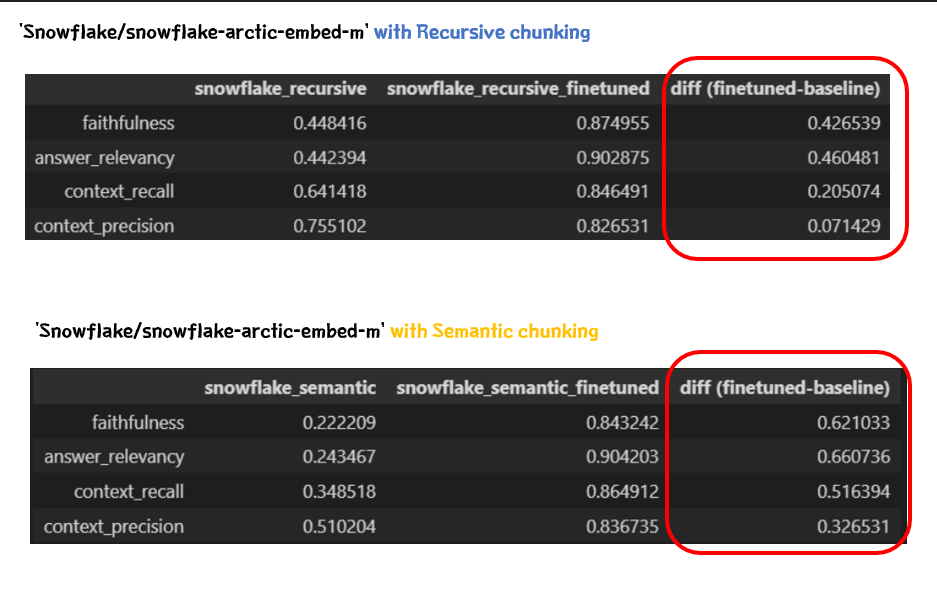

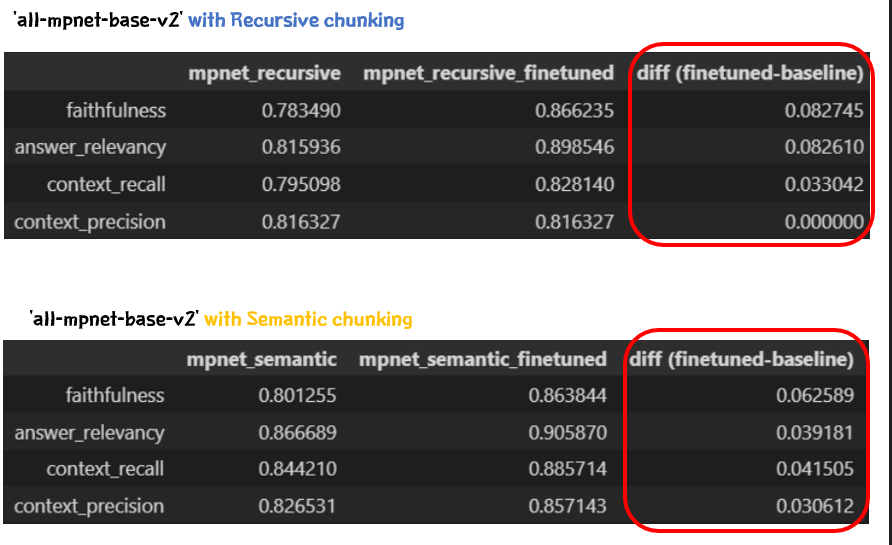

2. Test the two chunking strategies using the RAGAS frameworks to quantify any improvements. Provide results in a table. 

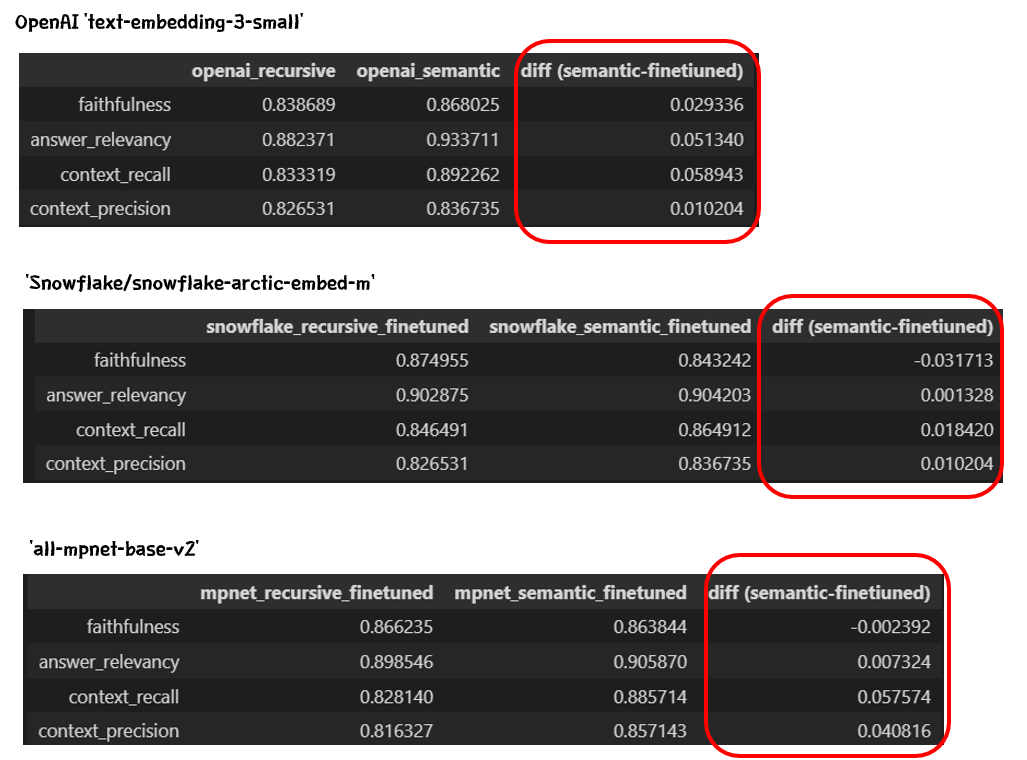


3. The AI Solutions Engineer asks you “Which one is the best to test with internal stakeholders next week, and why?”
- As far as 'finetuned' models are concerned, both open-source models, 'Snowflake/snowflake-arctic-embed-m' and 'all-mpnet-base-v2', show comparable performance to OpenAI's 'text-embedding-3-small' model. Therefore, it is more cost-effective to use one of the open-source models.

- Regarding the chunking strategy, there may not be a significant difference in performance between recursive chunking and semantic chunking. However, semantic chunking outperformed recursive chunking in three out of four categories (answer relevancy, context recall, context precision). Hence, I recommend using semantic chunking.


## 👩‍💻 Task 6: Managing Your Boss and User Expectation

You are the SVP of Technology.  Given the work done by your team so far, you're now sitting down with the AI Solutions Engineer.  You have tasked the solutions engineer to test out the new application with at least 50 different internal stakeholders over the next month.

##### 🤗 Deliverables of Task 6
1. What is the story that you will give to the CEO to tell the whole company at the launch next month?
-  Our AI team has made remarkable progress in developing a domain-specific model that rivals the performance of some of the best in the industry, including OpenAI’s proprietary model.

- By intentionally focusing on a specific domain and allowing some level of overfitting, we were able to fine-tune our model to meet the precise needs of our users. This strategic approach has enabled us to achieve exceptional accuracy and relevance in our AI solutions.


2. There appears to be important information not included in our build, for instance, the 270-day update on the 2023 executive order on Safe, Secure, and Trustworthy AI. How might you incorporate relevant white-house briefing information into future versions? 
- CI/CD Setup: Establish a robust Continuous Integration and Continuous Deployment (CI/CD) pipeline for the Retrieval-Augmented Generation (RAG) system. This pipeline will enable us to:

    - Regular Updates: Schedule regular updates of the vector database and embedding models to include new information from sources such as White House briefings, policy changes, and other relevant documents.
    - On-Demand Updates: Allow for on-demand updates to quickly incorporate any urgent or high-priority information.

- Automate Data Ingestion and Processing
    - Automated Data Sources: Set up automated ingestion of relevant data sources, such as government websites, official briefings, and trusted news outlets.
    - Data Preprocessing: Implement preprocessing scripts to clean, categorize, and extract key information from these sources before integrating it into the vector database.